# Setup

In [6]:
### Import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from datetime import datetime

from keras.datasets import mnist

In [3]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           xlabel='Predicted label',
           ylabel='True label',
           title='Confusion matrix')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2. else "black")
    fig.tight_layout()
    plt.show()

def plot_graphs(history, best):
  
  plt.figure(figsize=[10,4])
  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy across training\n best accuracy of %.02f'%best[1])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  
  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss across training\n best loss of %.02f'%best[0])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [4]:
num_classes = 10
input_shape = (28, 28, 1)

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 [==============================] - 2s 0us/step


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
batch_size = 256
epochs = 5

checkpoint = keras.callbacks.ModelCheckpoint(
    "best_model",
    verbose = 0,
    monitor = "val_loss",
    save_best_only = True,
    mode = "auto",
)

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

model.compile(
    optimizer= keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    )

model_history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks= [checkpoint],
)

model_performance = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/5
211/211 [==============================] - ETA: 0s - loss: 0.4998 - accuracy: 0.8496

211/211 [==============================] - 11s 15ms/step - loss: 0.4998 - accuracy: 0.8496 - val_loss: 0.1069 - val_accuracy: 0.9725
Epoch 2/5
202/211 [===========================>..] - ETA: 0s - loss: 0.1445 - accuracy: 0.9556

211/211 [==============================] - 2s 11ms/step - loss: 0.1434 - accuracy: 0.9559 - val_loss: 0.0752 - val_accuracy: 0.9795
Epoch 3/5
206/211 [============================>.] - ETA: 0s - loss: 0.1056 - accuracy: 0.9678

211/211 [==============================] - 2s 10ms/step - loss: 0.1051 - accuracy: 0.9681 - val_loss: 0.0595 - val_accuracy: 0.9843
Epoch 4/5
205/211 [============================>.] - ETA: 0s - loss: 0.0876 - accuracy: 0.9735

211/211 [==============================] - 2s 10ms/step - loss: 0.0877 - accuracy: 0.9734 - val_loss: 0.0481 - val_accuracy: 0.9878
Epoch 5/5
205/211 [============================>.] - ETA: 0s - loss: 0.0761 - accuracy: 0.9768

313/313 [==============================] - 1s 3ms/step - loss: 0.0442 - accuracy: 0.9863


# Performance

Test loss: 0.04422896355390549
Test accuracy: 0.986299991607666


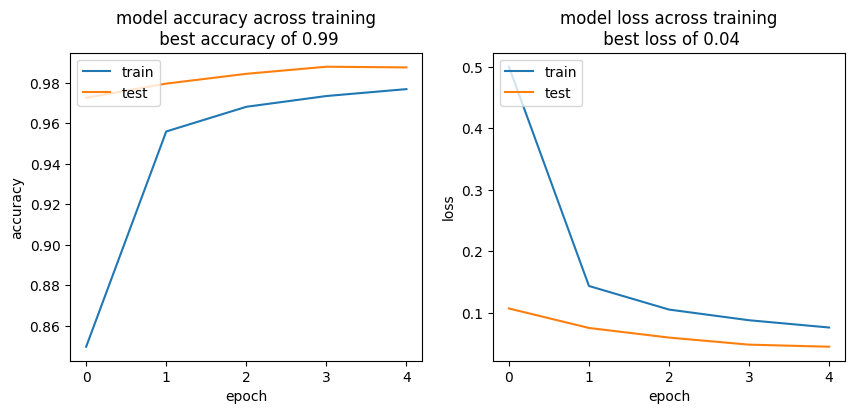

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plot_graphs(model_history, model_performance)

313/313 [==============================] - 1s 2ms/step


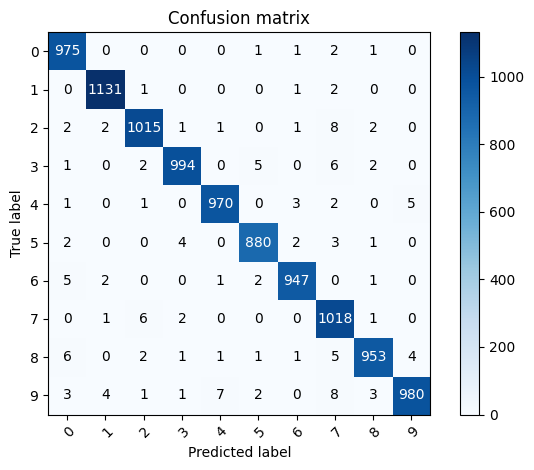

In [13]:
y_test_class = np.argmax(y_test, axis = 1)

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis = 1)

y_pred_max = np.zeros(y_pred.shape)
y_pred_max[np.arange(y_pred.shape[0]), y_pred_class] = 1

label_names = ['0','1','2','3','4','5','6','7','8','9']
labels = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(y_test_class, y_pred_class, labels)

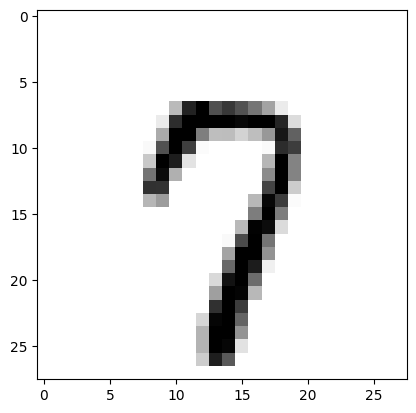

label: 7
prediction: [7]


In [14]:
selection = 1401
result = np.argmax(model(np.expand_dims(x_test[selection], axis=(0))), axis=(1))
plt.imshow(x_test[selection], cmap='gray_r')
plt.show()
print("label:", np.argmax(y_test[selection], axis=(0)))
print("prediction:", result)

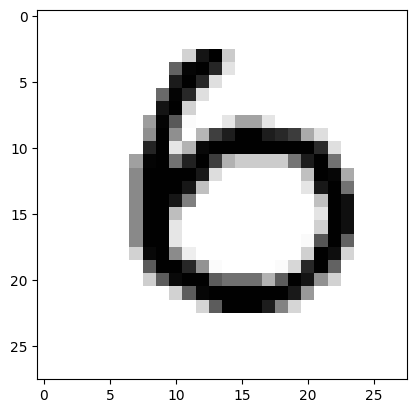

label: 6 prediction: 0


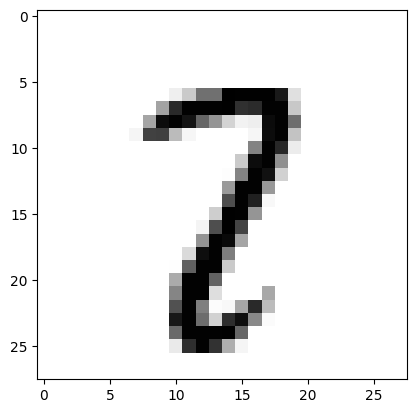

label: 2 prediction: 7


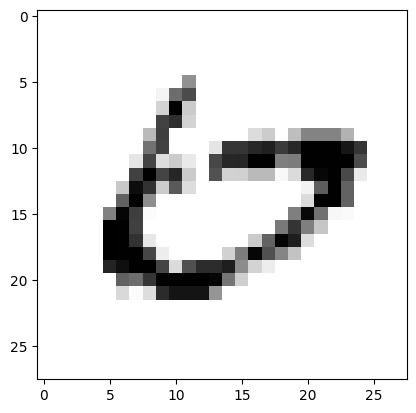

label: 6 prediction: 0


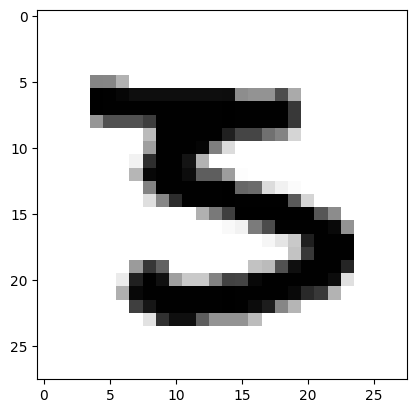

label: 3 prediction: 5


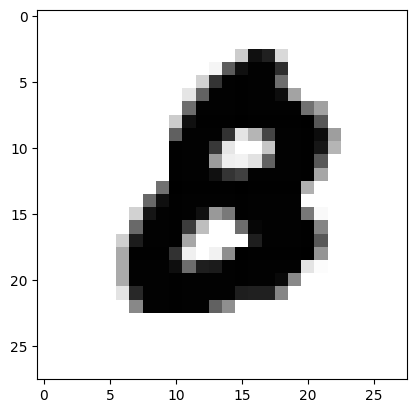

label: 8 prediction: 0


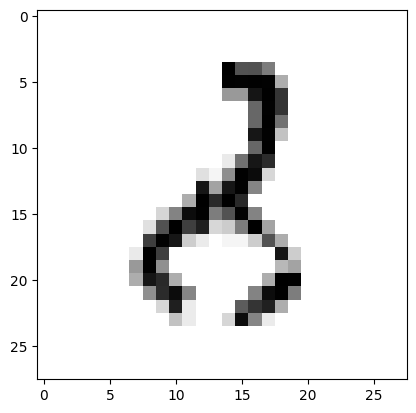

label: 8 prediction: 2


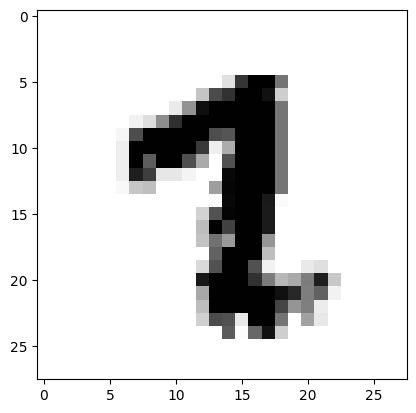

label: 2 prediction: 1


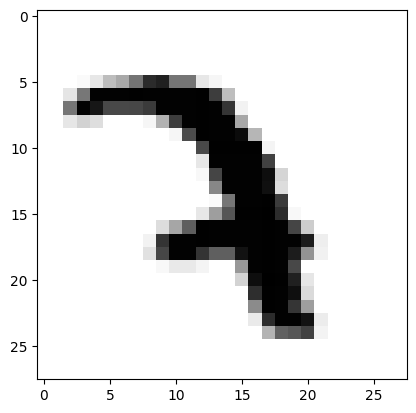

label: 7 prediction: 3


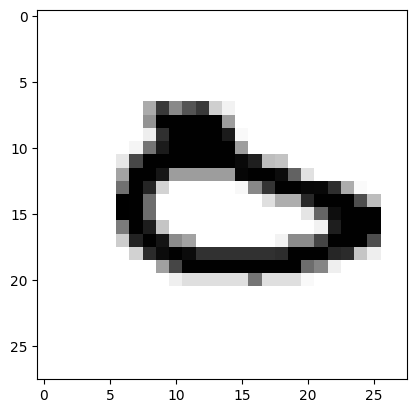

label: 0 prediction: 5


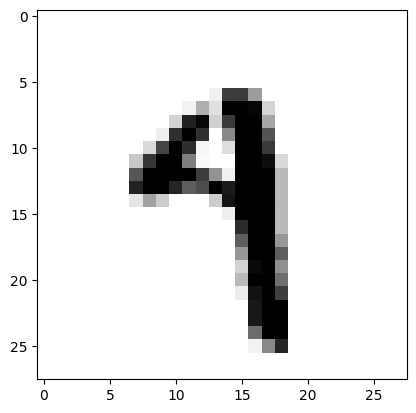

label: 4 prediction: 9


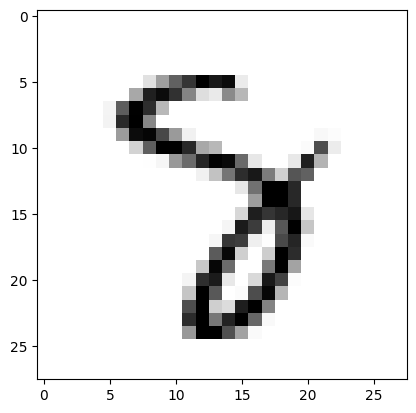

label: 8 prediction: 7


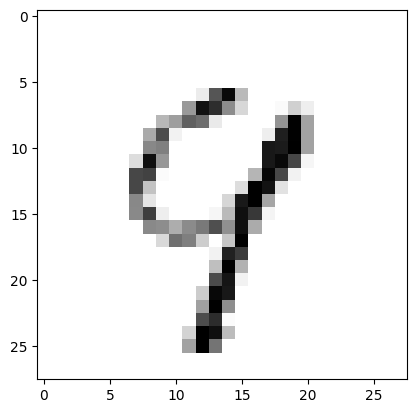

label: 9 prediction: 7


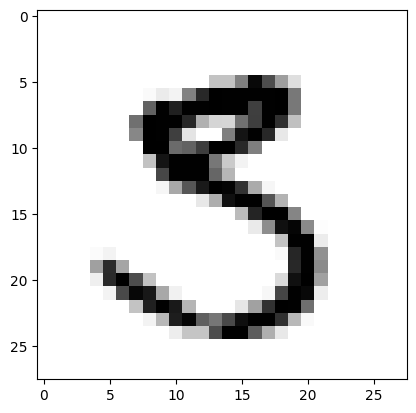

label: 3 prediction: 5


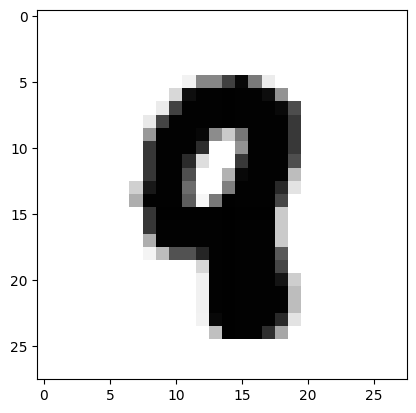

label: 8 prediction: 9


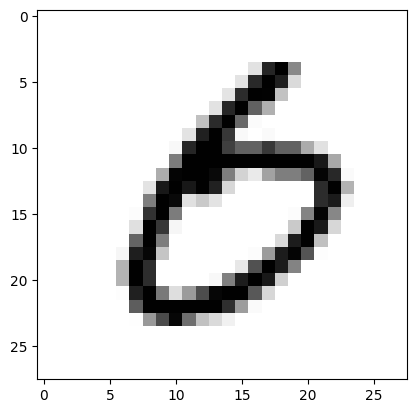

label: 6 prediction: 0


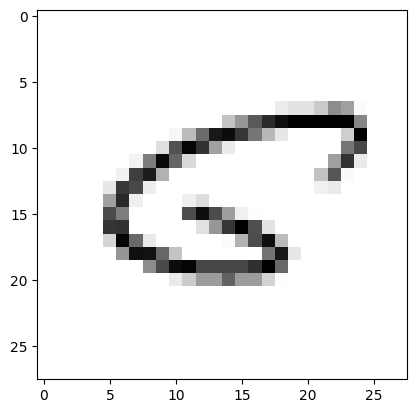

label: 6 prediction: 5


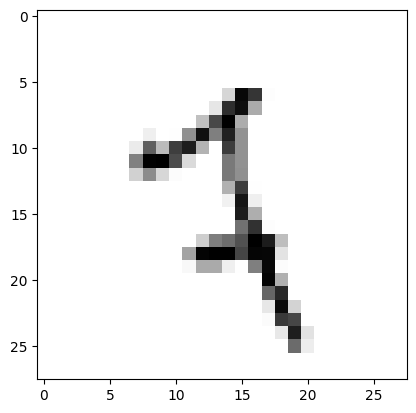

label: 7 prediction: 3


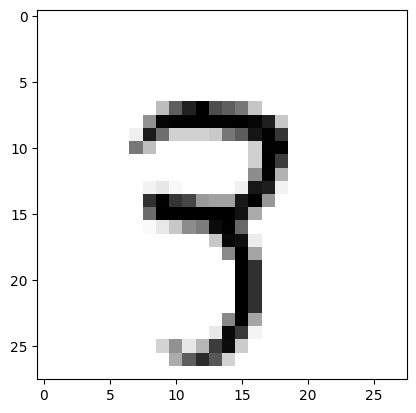

label: 3 prediction: 7


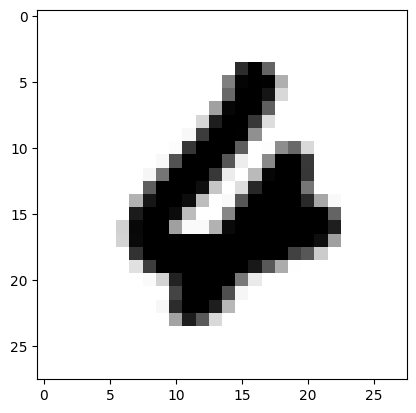

label: 4 prediction: 6


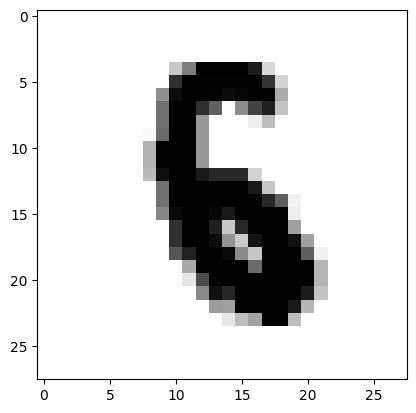

label: 6 prediction: 5


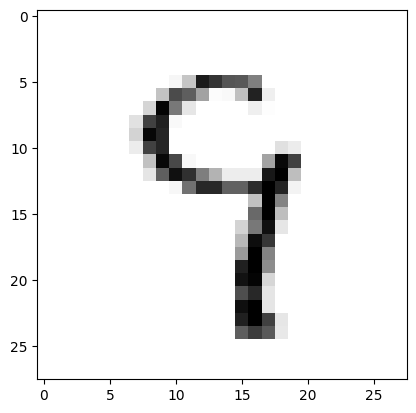

label: 9 prediction: 7


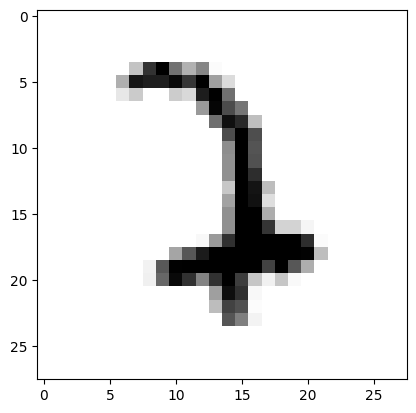

label: 7 prediction: 2


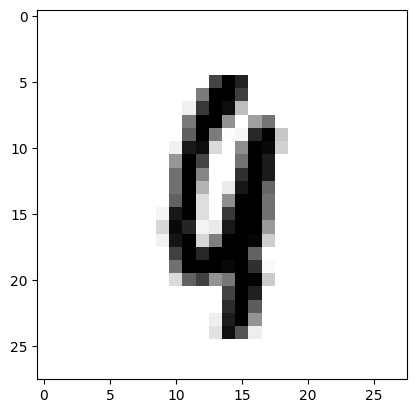

label: 9 prediction: 4


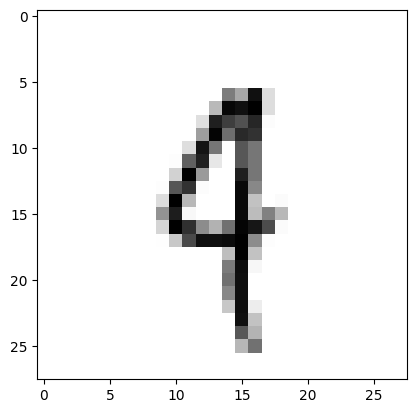

label: 4 prediction: 9


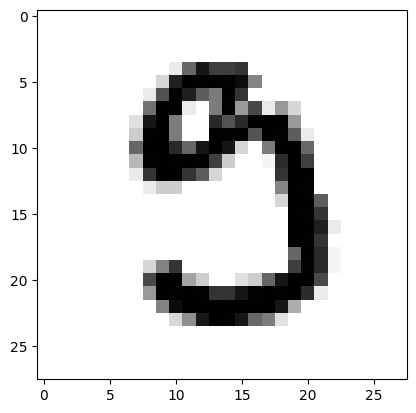

label: 9 prediction: 0


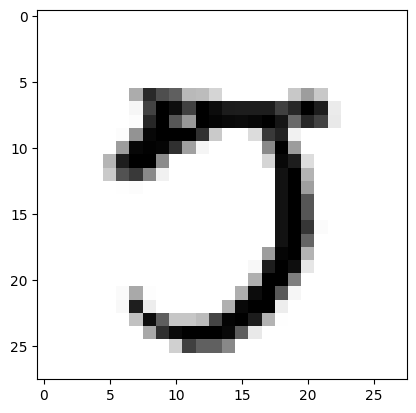

label: 5 prediction: 7


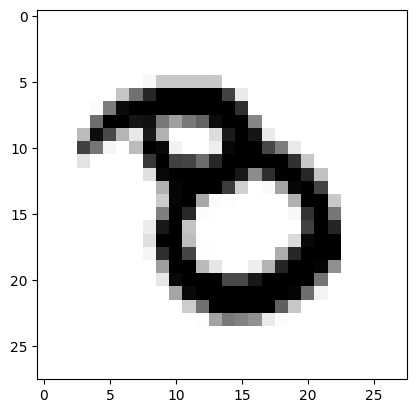

label: 8 prediction: 0


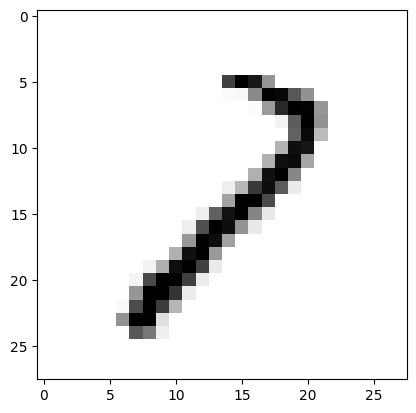

label: 7 prediction: 2


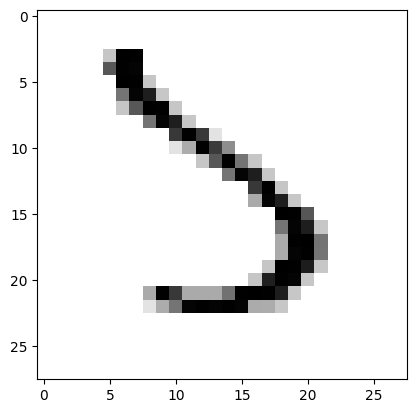

label: 5 prediction: 3


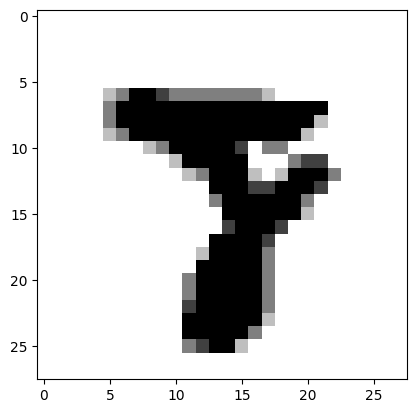

label: 8 prediction: 7


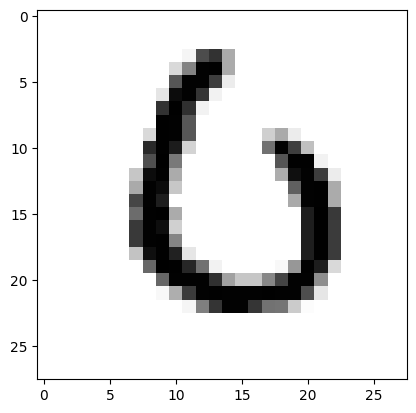

label: 0 prediction: 6


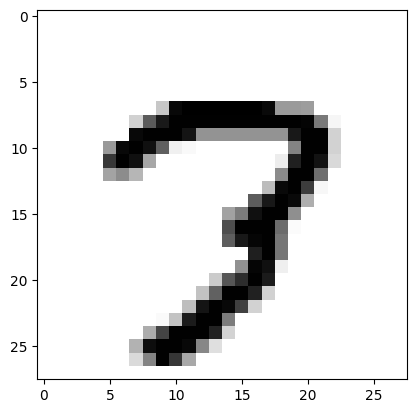

label: 3 prediction: 7


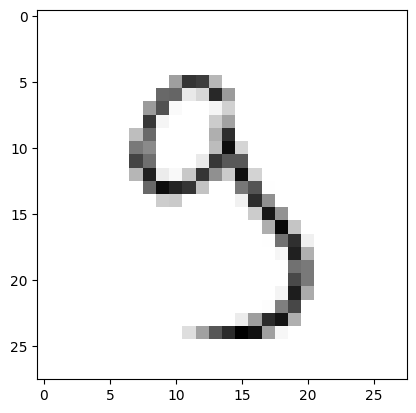

label: 9 prediction: 5


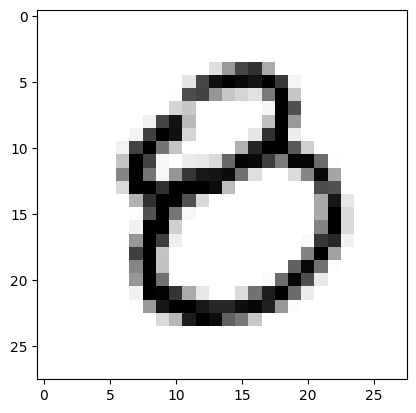

label: 8 prediction: 0


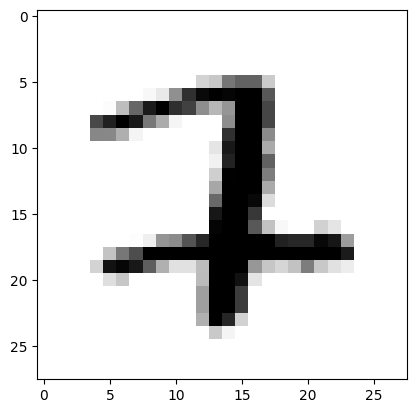

label: 7 prediction: 2


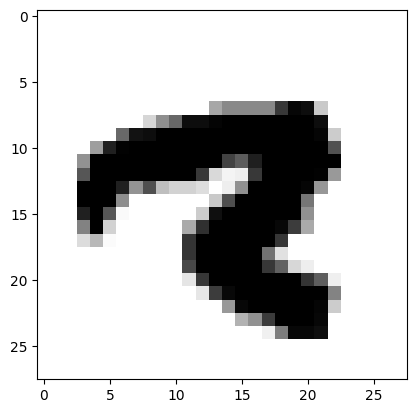

label: 2 prediction: 7


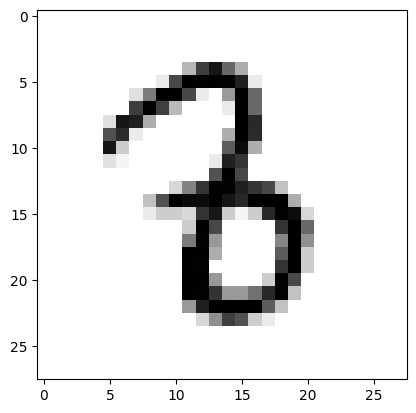

label: 8 prediction: 3


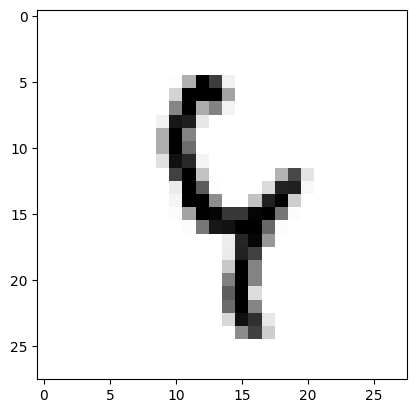

label: 9 prediction: 4


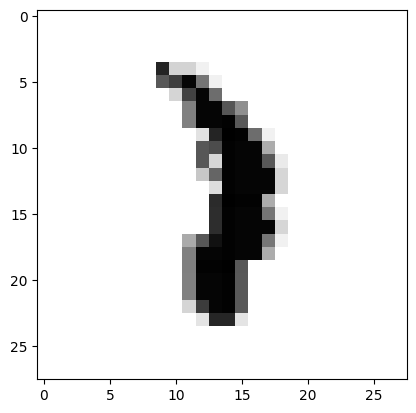

label: 1 prediction: 7


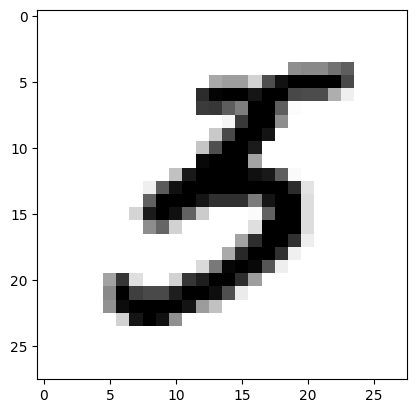

label: 5 prediction: 3


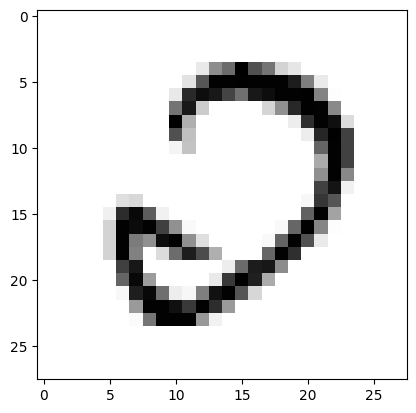

label: 2 prediction: 0


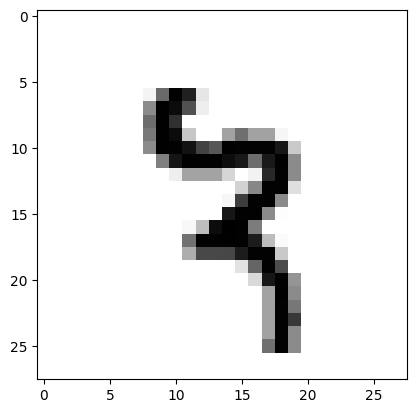

label: 3 prediction: 7


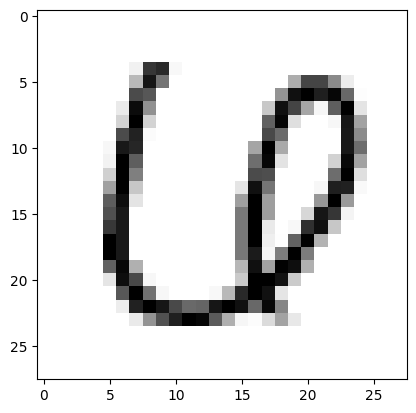

label: 6 prediction: 0


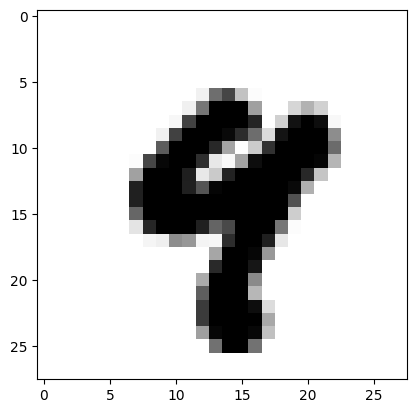

label: 4 prediction: 9


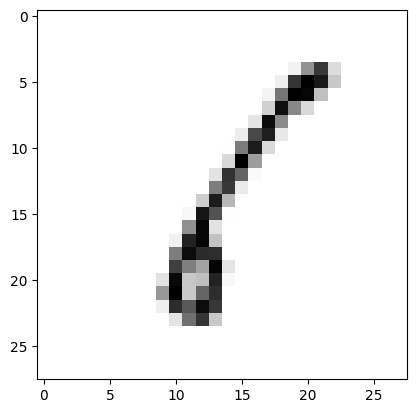

label: 6 prediction: 1


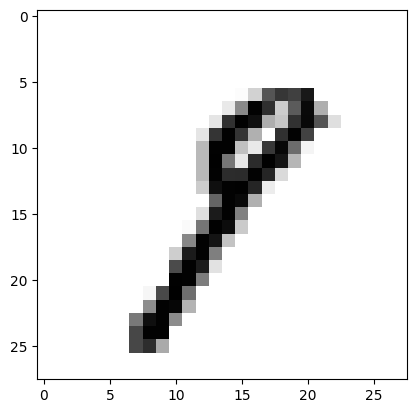

label: 9 prediction: 1


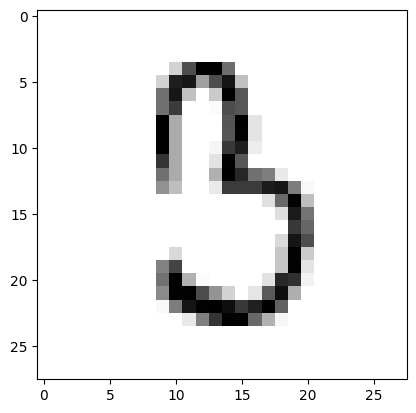

label: 3 prediction: 5


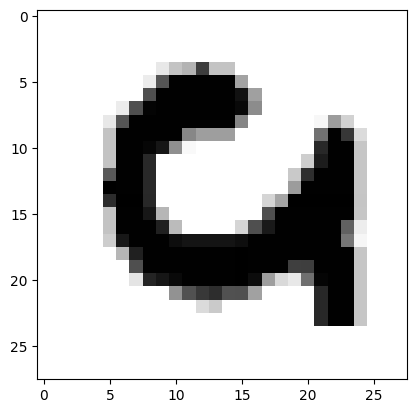

label: 9 prediction: 0


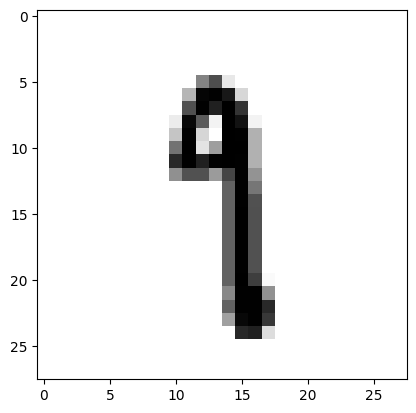

label: 9 prediction: 1


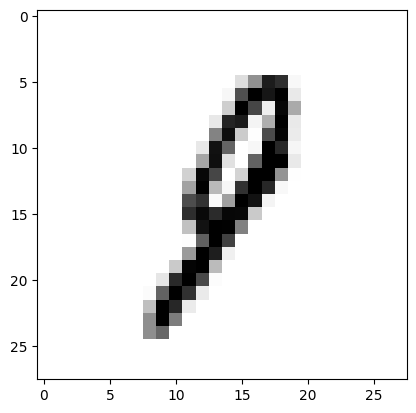

label: 9 prediction: 8


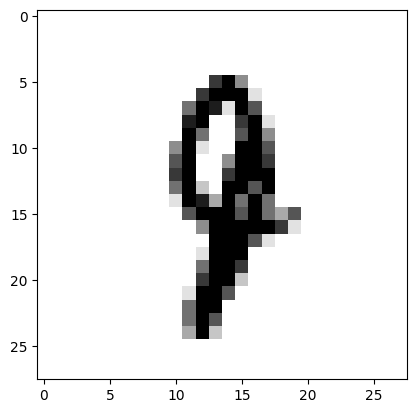

label: 9 prediction: 4


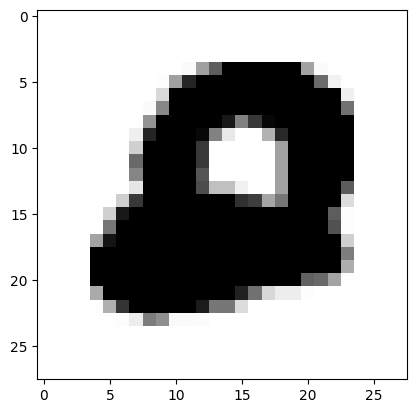

label: 2 prediction: 0


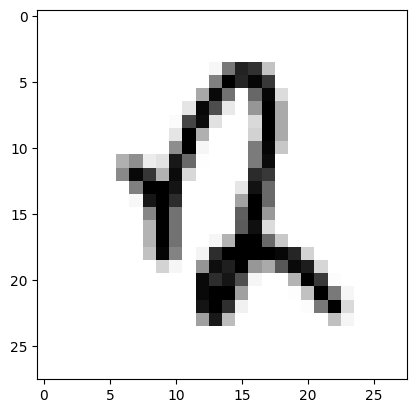

label: 2 prediction: 4


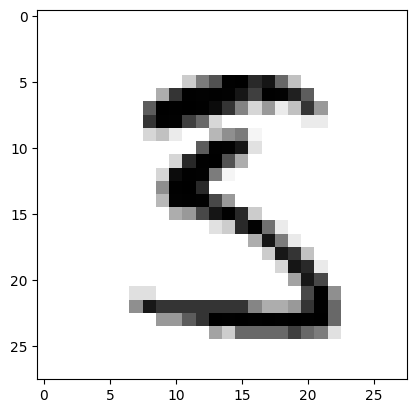

label: 5 prediction: 3


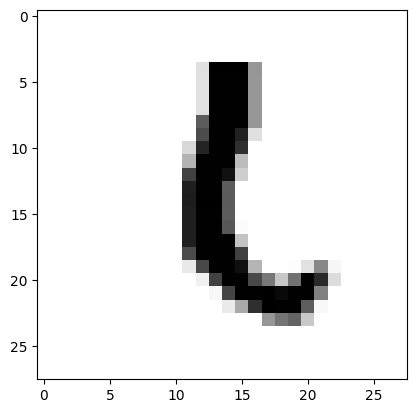

label: 6 prediction: 1


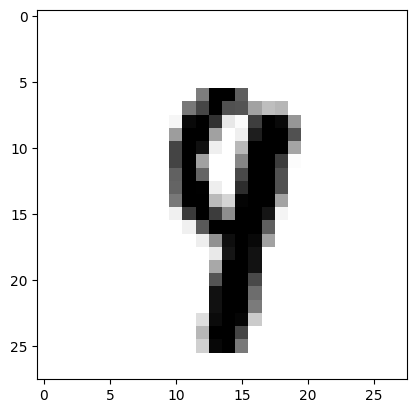

label: 9 prediction: 4


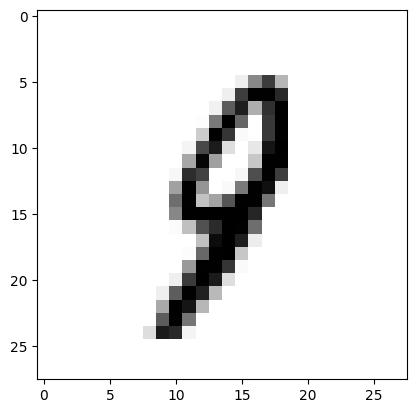

label: 9 prediction: 4


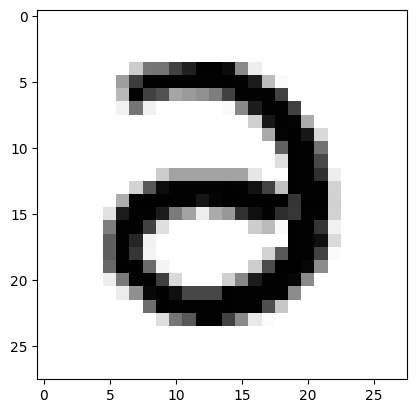

label: 2 prediction: 3


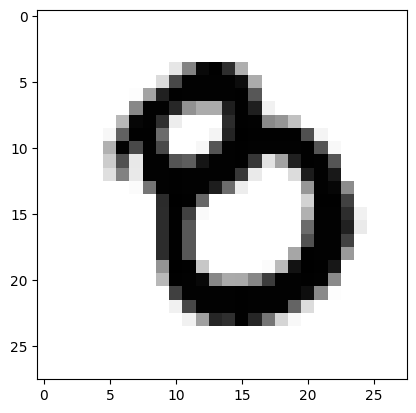

label: 8 prediction: 0


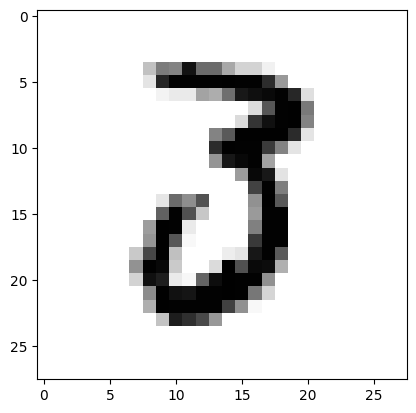

label: 3 prediction: 2


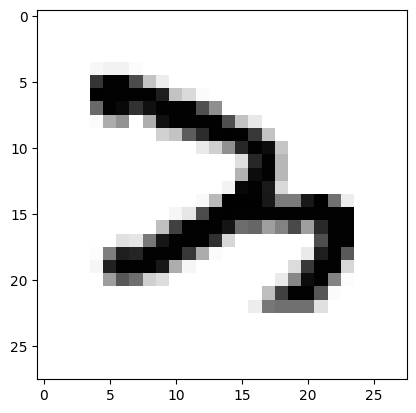

label: 3 prediction: 2


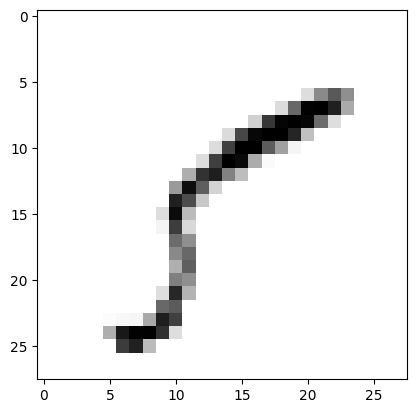

label: 5 prediction: 7


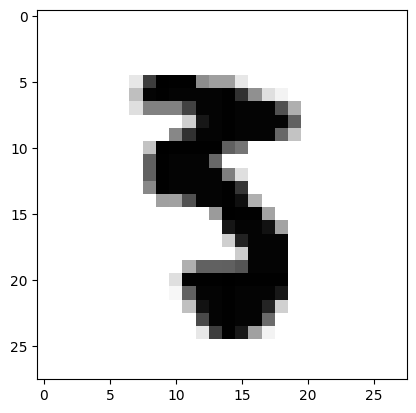

label: 3 prediction: 5


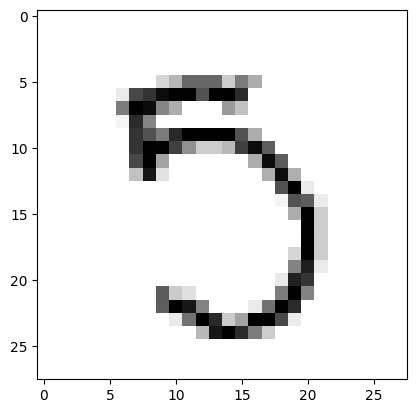

label: 5 prediction: 3


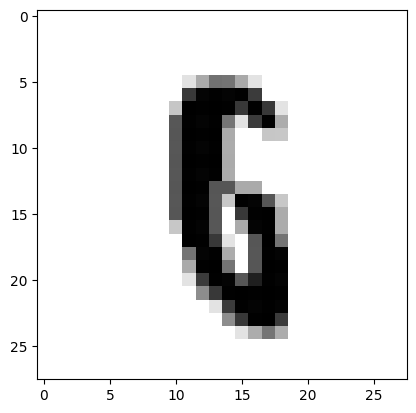

label: 6 prediction: 8


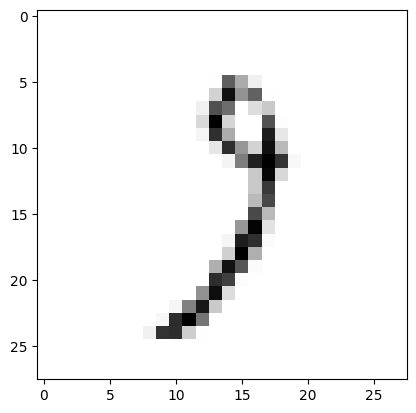

label: 9 prediction: 7


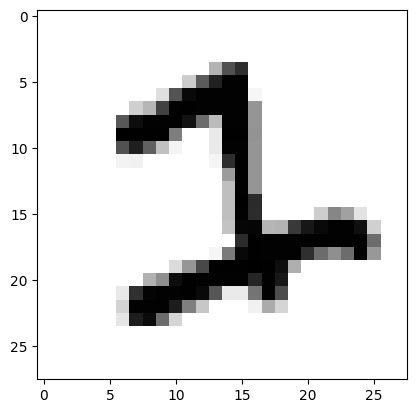

label: 1 prediction: 2


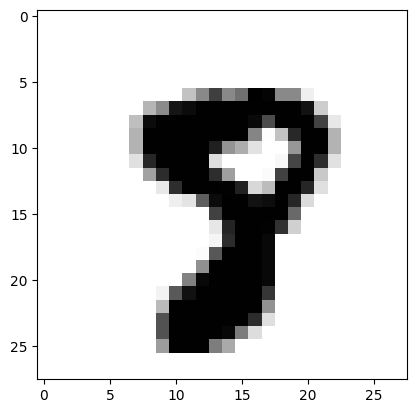

label: 8 prediction: 9


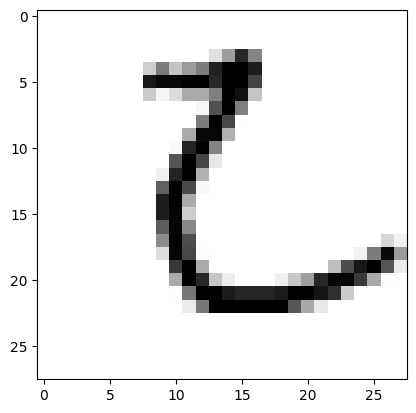

label: 2 prediction: 6


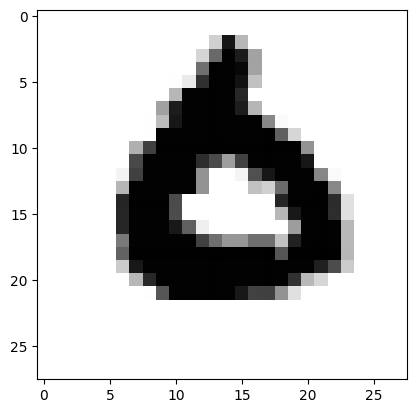

label: 6 prediction: 0


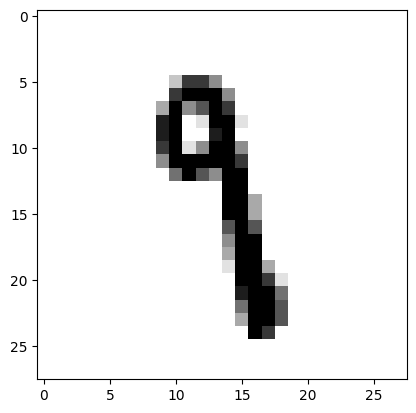

label: 9 prediction: 1


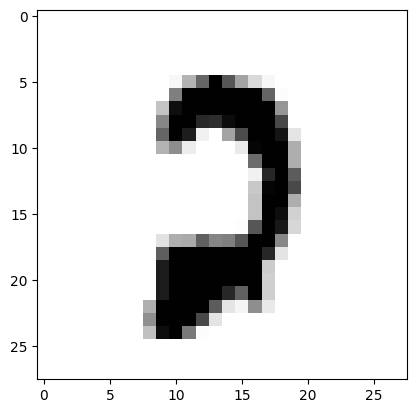

label: 2 prediction: 7


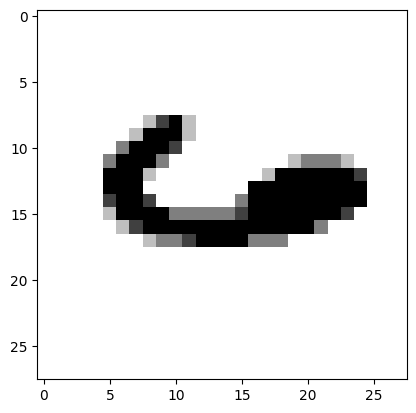

label: 6 prediction: 4


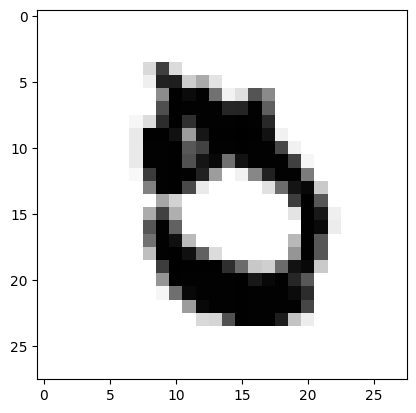

label: 5 prediction: 0


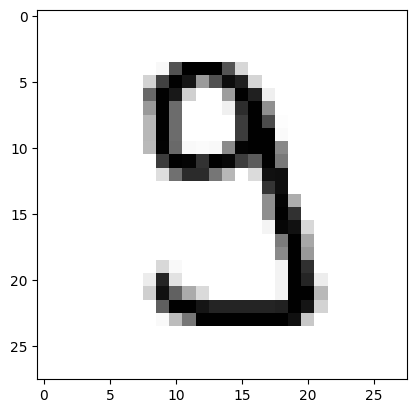

label: 9 prediction: 3


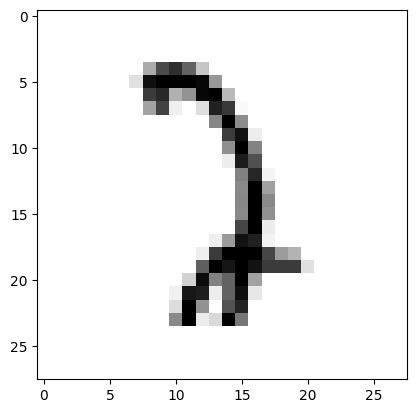

label: 2 prediction: 7


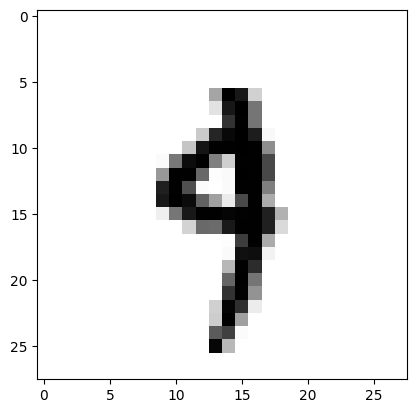

label: 4 prediction: 9


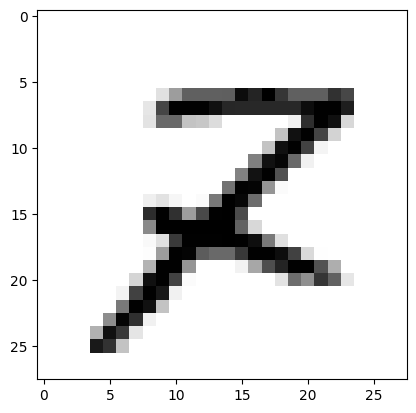

label: 7 prediction: 2


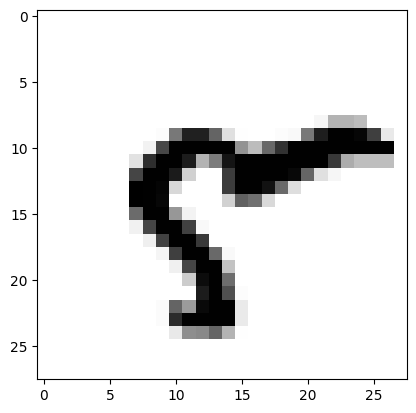

label: 5 prediction: 8


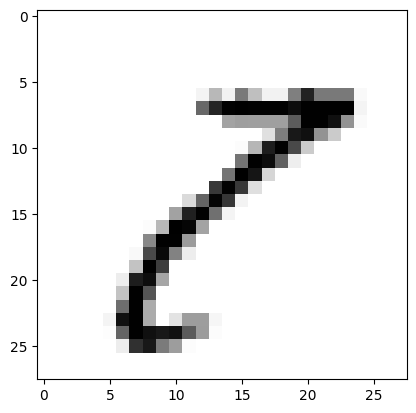

label: 7 prediction: 8


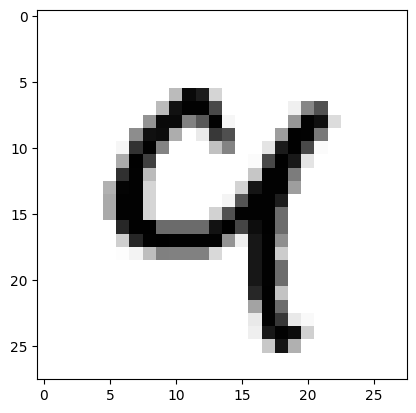

label: 9 prediction: 4


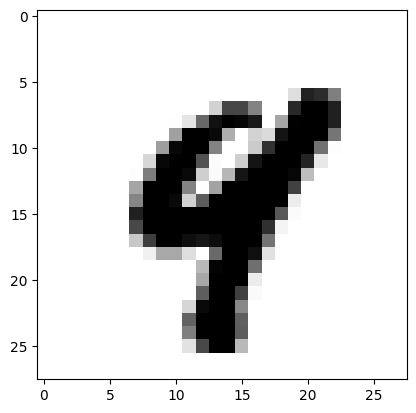

label: 9 prediction: 4


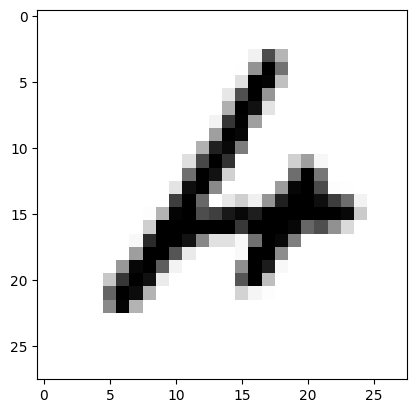

label: 4 prediction: 6


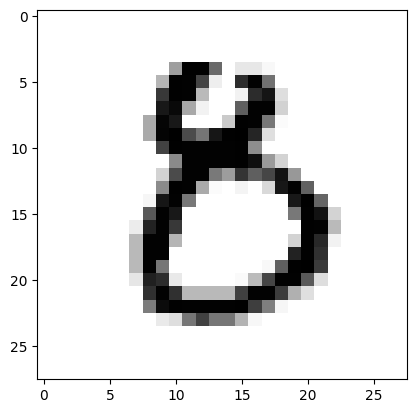

label: 8 prediction: 0


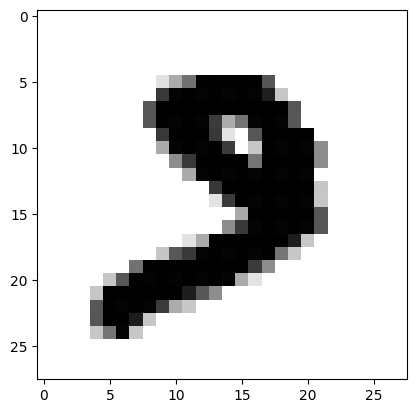

label: 9 prediction: 2


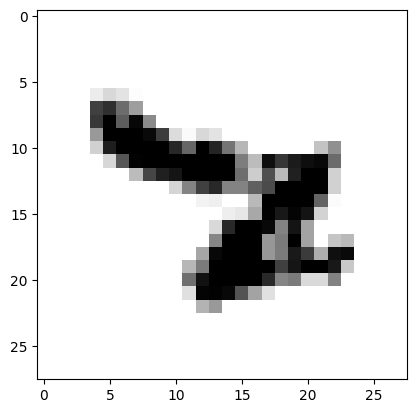

label: 2 prediction: 7


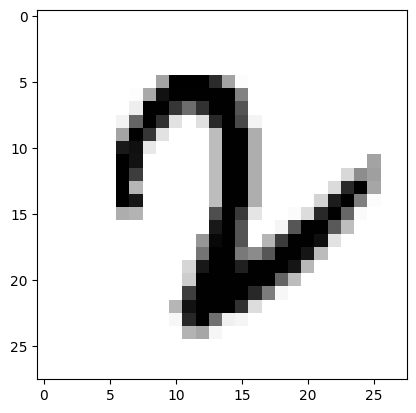

label: 2 prediction: 7


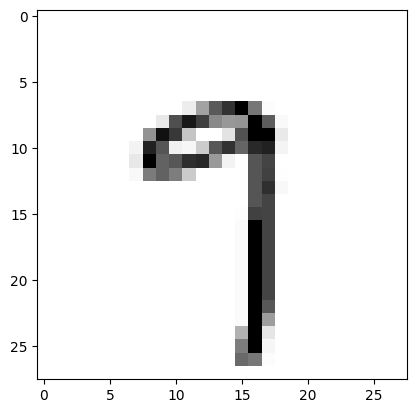

label: 9 prediction: 7


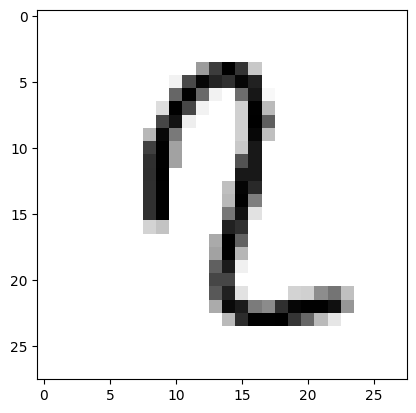

label: 2 prediction: 8


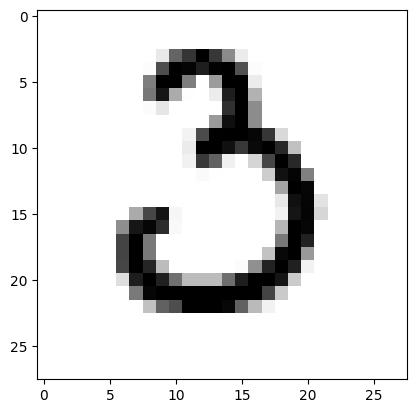

label: 3 prediction: 0


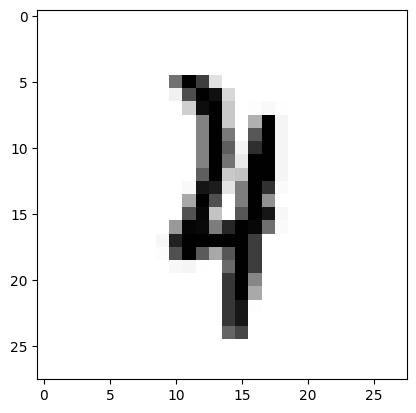

label: 4 prediction: 7


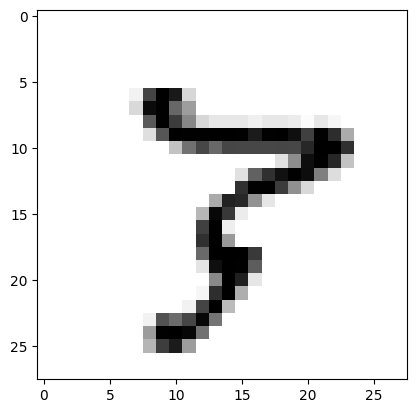

label: 3 prediction: 7


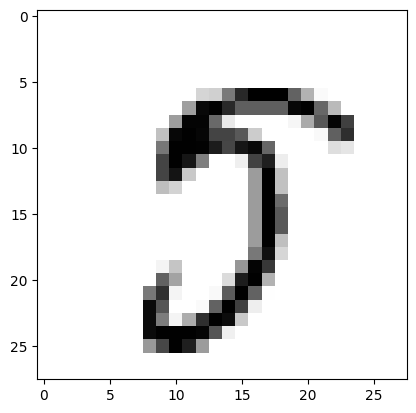

label: 5 prediction: 7


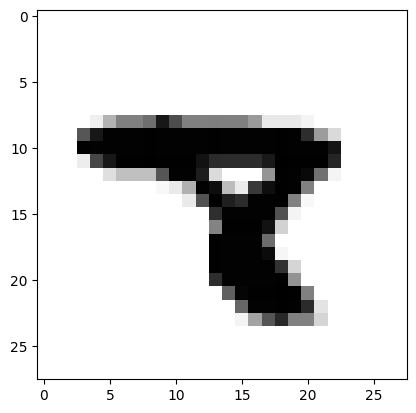

label: 8 prediction: 7


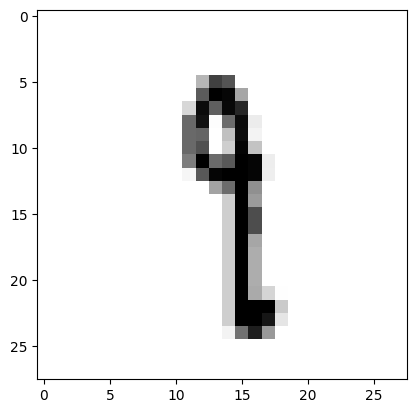

label: 9 prediction: 1


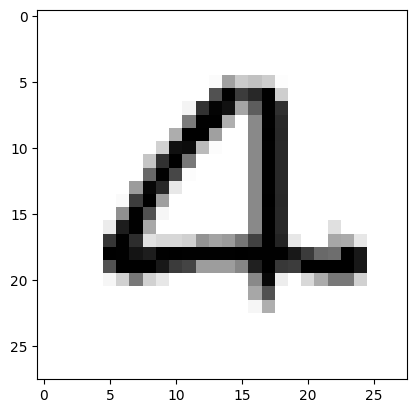

label: 4 prediction: 2


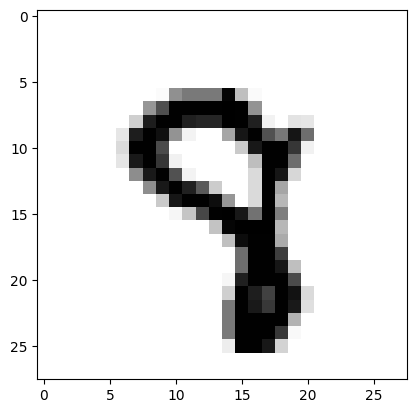

label: 8 prediction: 9


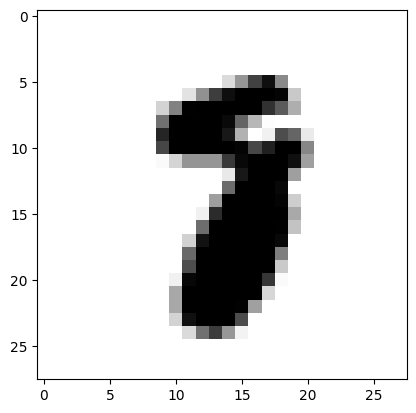

label: 8 prediction: 7


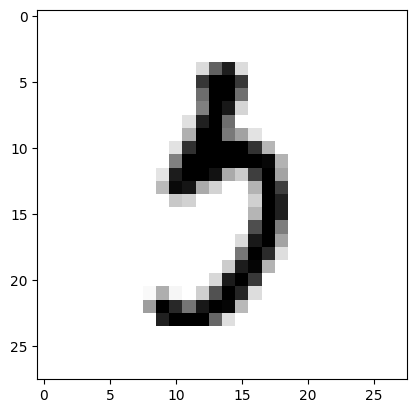

label: 3 prediction: 5


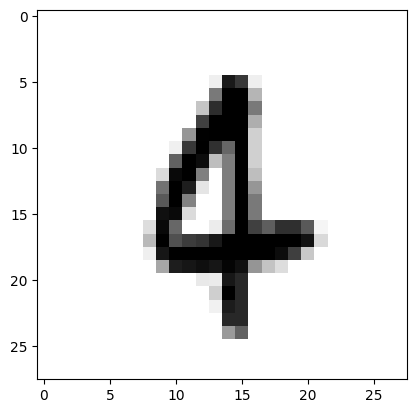

label: 4 prediction: 6


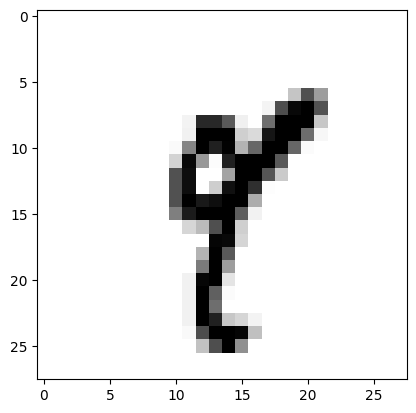

label: 9 prediction: 8


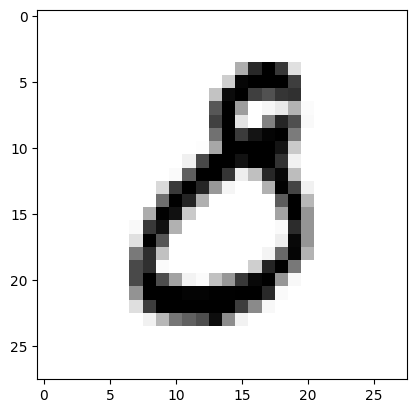

label: 8 prediction: 0


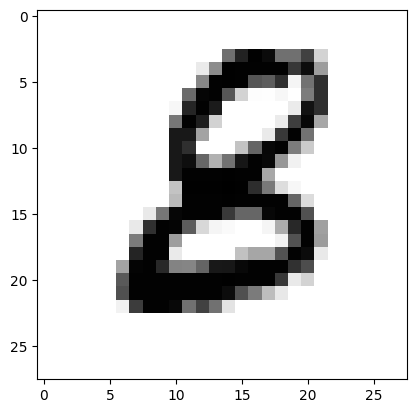

label: 8 prediction: 6


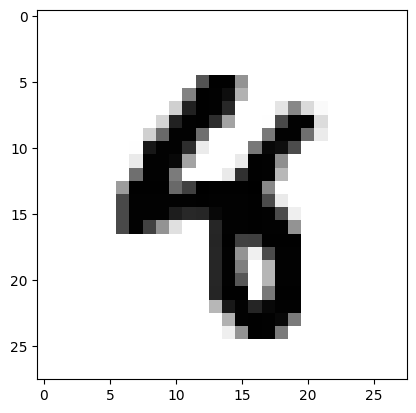

label: 8 prediction: 4


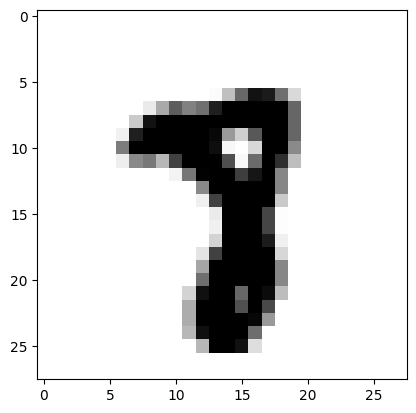

label: 8 prediction: 7


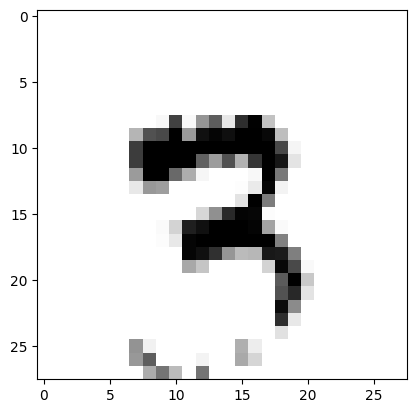

label: 3 prediction: 7


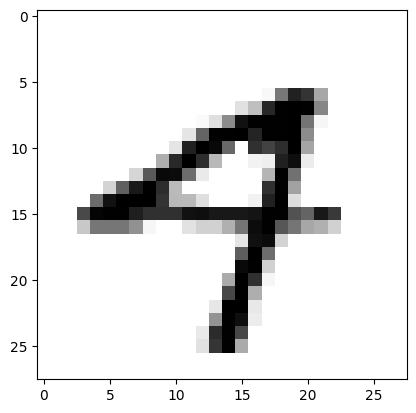

label: 4 prediction: 7


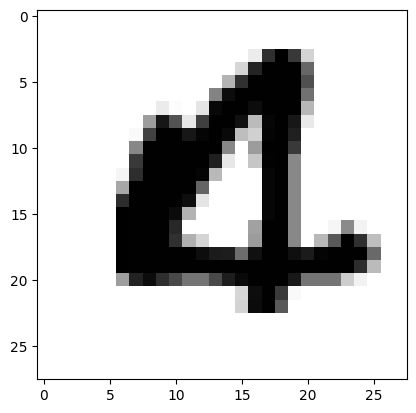

label: 4 prediction: 0


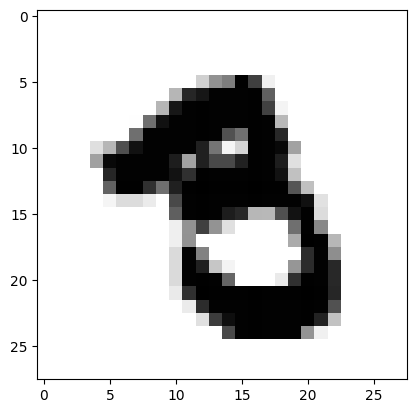

label: 3 prediction: 8


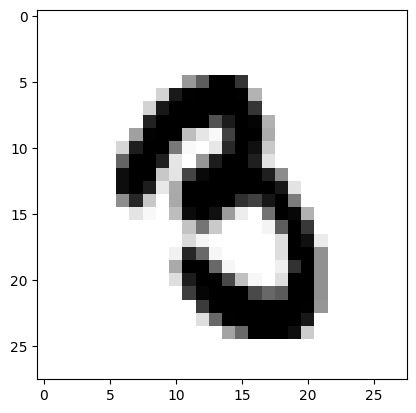

label: 3 prediction: 8


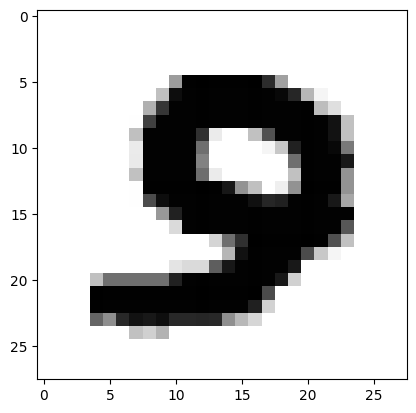

label: 9 prediction: 5


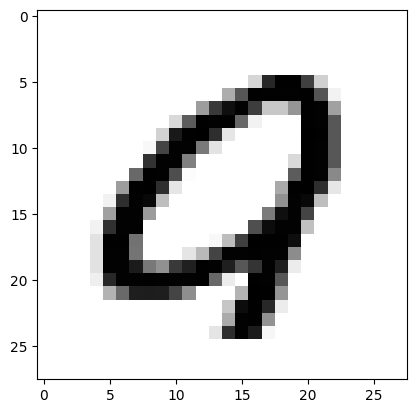

label: 9 prediction: 0


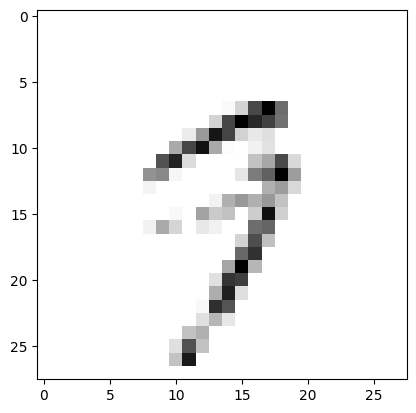

label: 9 prediction: 7


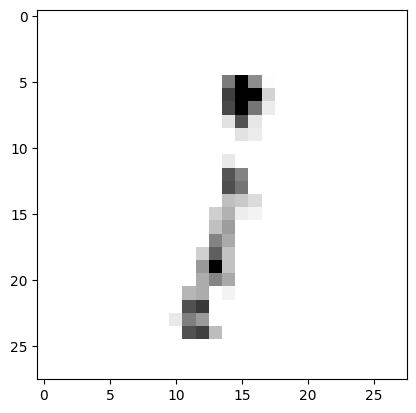

label: 1 prediction: 7


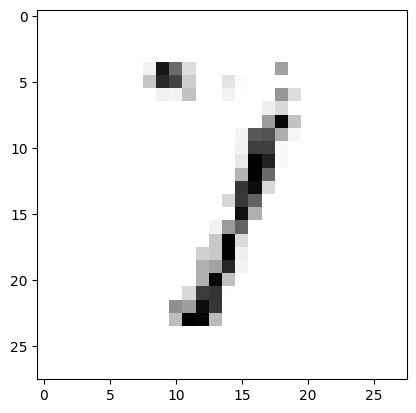

label: 7 prediction: 1


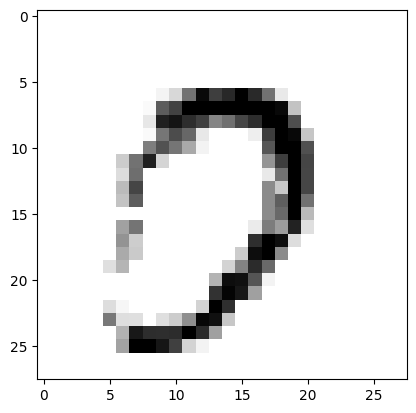

label: 0 prediction: 7


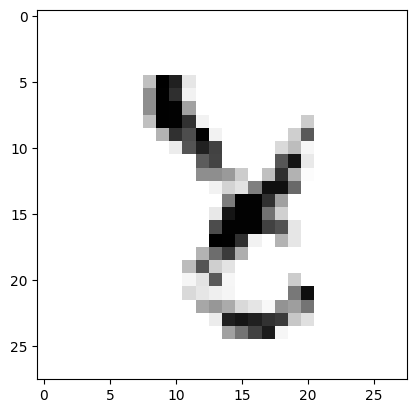

label: 8 prediction: 2


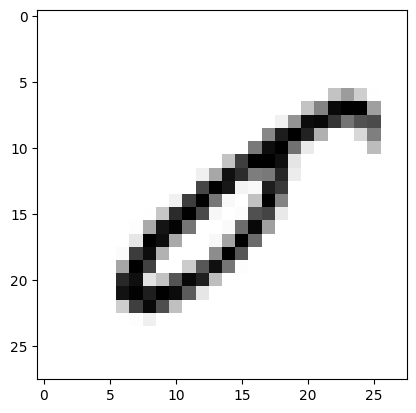

label: 0 prediction: 8


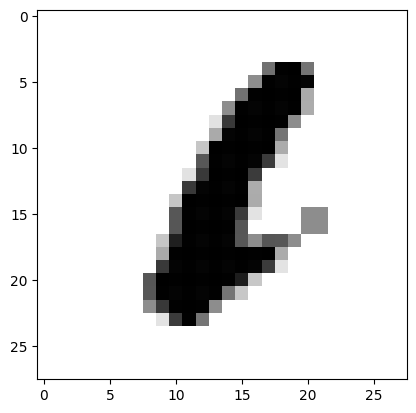

label: 1 prediction: 6


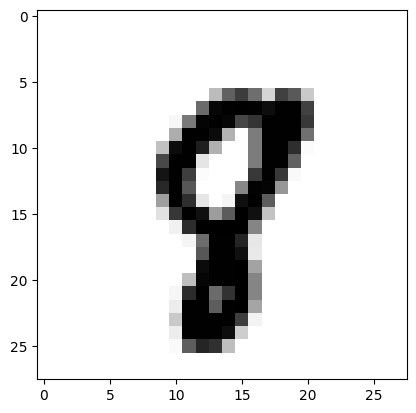

label: 8 prediction: 9


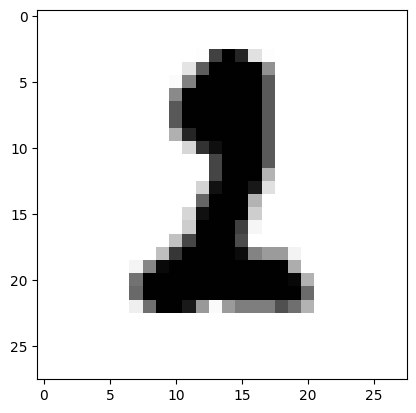

label: 2 prediction: 1


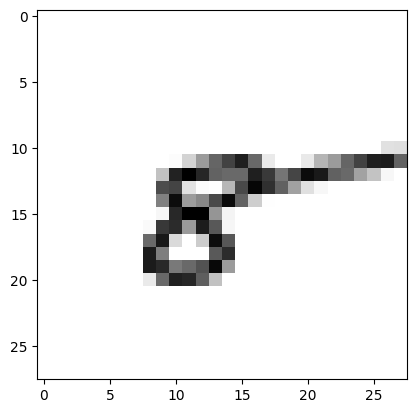

label: 8 prediction: 5


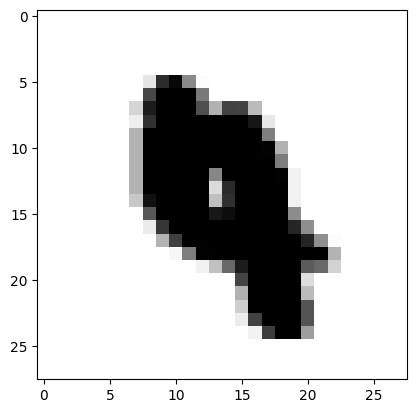

label: 4 prediction: 9


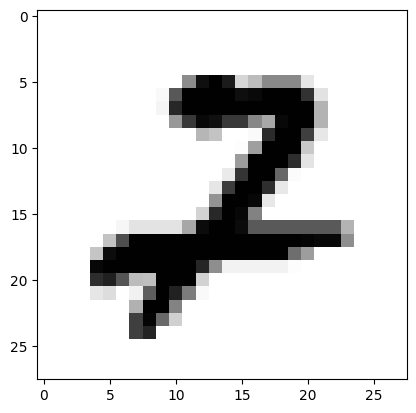

label: 7 prediction: 2


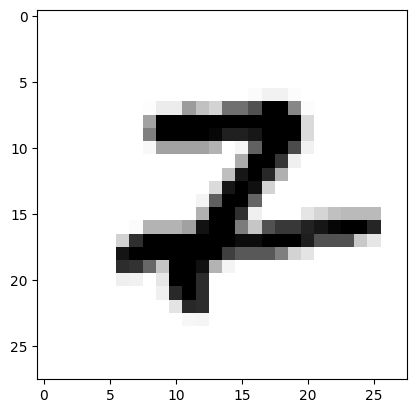

label: 7 prediction: 2


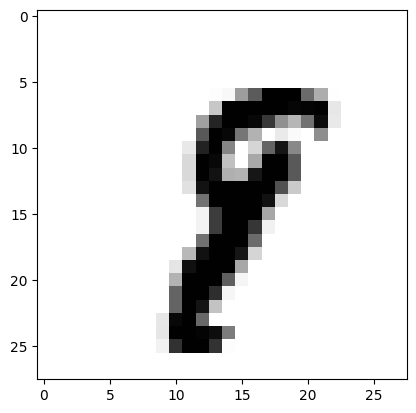

label: 9 prediction: 8


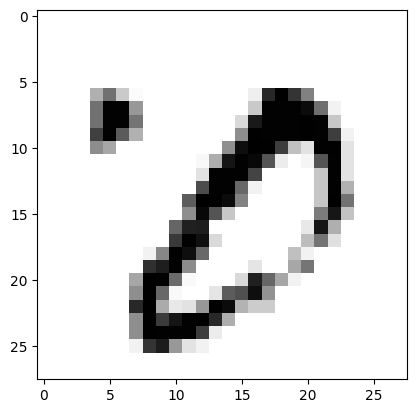

label: 0 prediction: 7


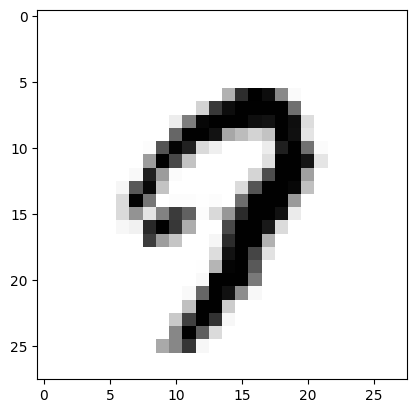

label: 9 prediction: 7


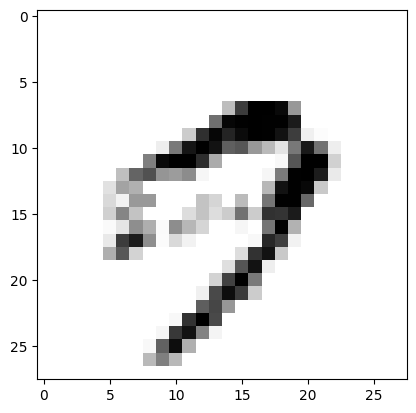

label: 9 prediction: 7


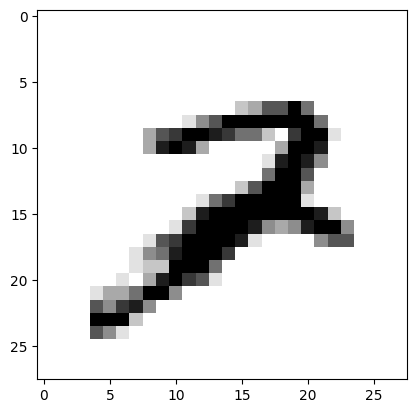

label: 2 prediction: 7


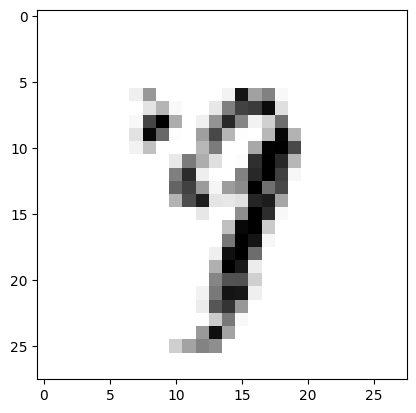

label: 9 prediction: 7


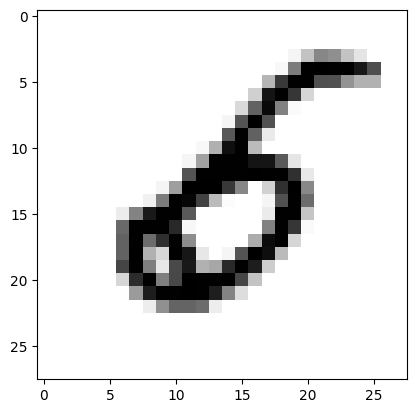

label: 5 prediction: 6


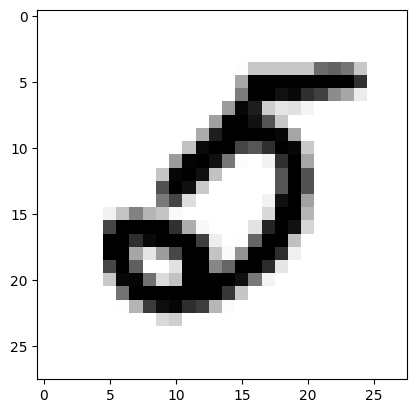

label: 5 prediction: 0


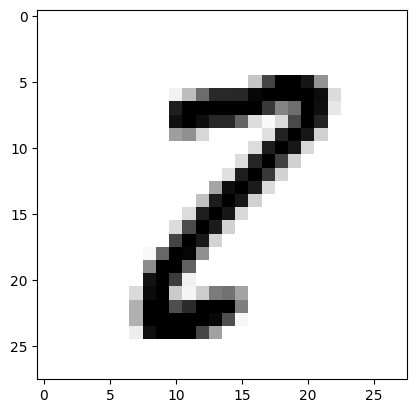

label: 2 prediction: 8


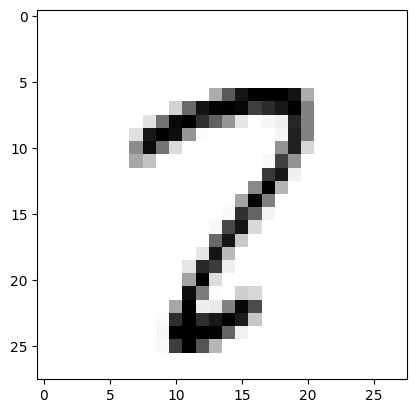

label: 2 prediction: 7


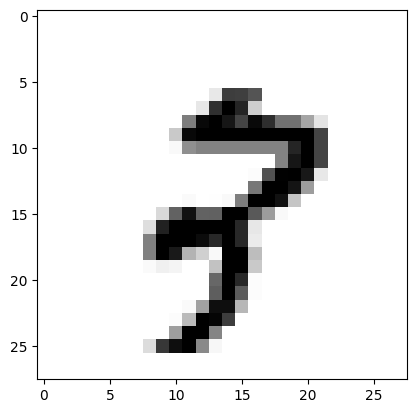

label: 3 prediction: 7


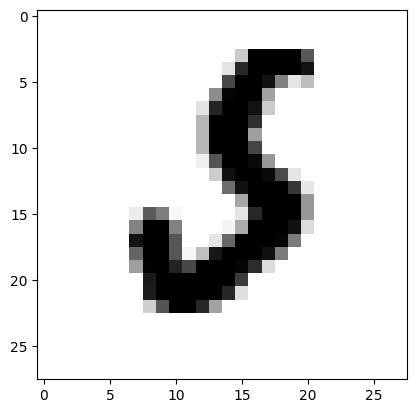

label: 5 prediction: 6


In [15]:
for index, i in enumerate(y_pred_class):
  if y_test_class[index] != i:
    plt.imshow(x_test[index], cmap='gray_r')
    plt.show()
    print("label:", y_test_class[index], "prediction:", i)

